In [1]:
%load_ext autoreload
%autoreload 2
import sys
if '..' not in sys.path: sys.path.append("..")

In [2]:
%reset -f
%matplotlib inline

# Segmentation final!

In [5]:
from src.classifier.agent import load_trainer
import nibabel as nib
from src.utils.preprocess import image2axial
from src.cam import CAM_TYPES, CAM
#from torch.utils.tensorboard import SummaryWriter

trainer, dataset, model = load_trainer('resnet50')
image = image2axial(nib.load('../data/SPM_categorised/AIH/AD/AD_ADNI_2975.nii').get_fdata())
cam_extractor = CAM(CAM_TYPES.GradCAMpp.value, model)


#tb_writer = SummaryWriter(log_dir=f'logs/visualisation/{type(model.model).__name__}/version_{round(time.time())}', filename_suffix='.CAM')

Data directory: data/SPM_categorised/Amira/
Dataset sizes - Training: 500 Validation: 56
Architecture [ResNet] was created
***Defined hyperparameters:***
"arch":                {'name': 'resnet50', 'args': {'num_channels': 1, 'num_classes': 3}}
"class_weights":       tensor([1.1905, 0.9311, 0.9208], device='cuda:0')
"hp_metrics":          ['loss/train', 'loss/val', 'accuracy/val', 'auc/val', 'specificity/val', 'sensitivity/val']
"kfold":               {'enable': False, 'folds': 10}
"loss":                {'type': 'CrossEntropyLoss', 'args': {'weight': True}}
"optimizer":           {'type': 'Adam', 'args': {'lr': 0.001, 'betas': [0, 0.9], 'weight_decay': 0, 'amsgrad': True}}
"roi_hparams":         {'enable': False, 'output_shape': [40, 40, 40], 'boundary_boxes': []}
"weight_distribution": normal


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.


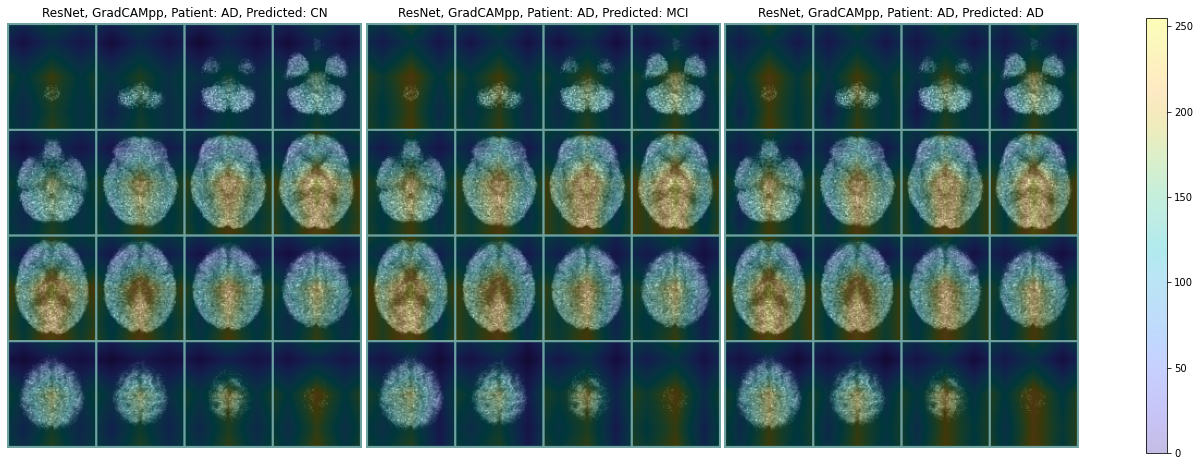

In [6]:
(class_scores, class_idx) = cam_extractor.evaluate(image)
cam_extractor.plot(class_scores, [0,1,2], image, class_label="AD");

#tb_writer.add_figure(f"{extractor_name}/{image}/{observed_class}",fig)